TP Estadística Actuarial 2C 2023

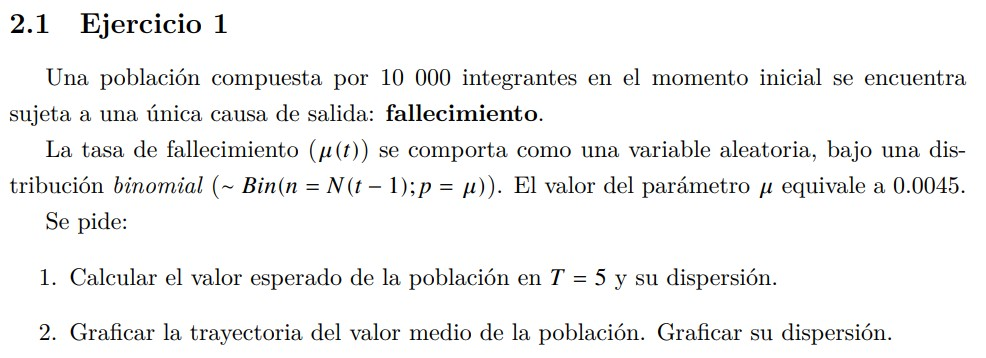

In [ ]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# Generador de números aleatorios
rng = np.random.default_rng(91218)

In [ ]:
# Definimos variables. Los "array_poblaciones_ti" son para almacenar las s simulaciones del tamaño de la poblacion en cada período.
n_inicial = 10000
mu = 0.0045
s = 1000
i = 0
array_poblaciones_t5 = []
array_poblaciones_t4 = []
array_poblaciones_t3 = []
array_poblaciones_t2 = []
array_poblaciones_t1 = []

In [ ]:
# Este bucle genera una tasa de fallecimiento "mu_t" que se comporta siguiendo la dist. binomial con los parámetros indicados en la consigna. La cantidad de fallecidos en t(i) se resta a la poblacion en t(i-1) hasta t(5) y se almacena esa población final simulada en "array_poblaciones". Repetimos "s" veces.
while i<s:
  n = n_inicial
  for t in range (1,6):
    mu_t = rng.binomial(n, mu)
    n = n - mu_t
    if t == 1:
      array_poblaciones_t1.append(n)
    elif t==2:
      array_poblaciones_t2.append(n)
    elif t==3:
      array_poblaciones_t3.append(n)
    elif t==4:
      array_poblaciones_t4.append(n)
    elif t==5:
      array_poblaciones_t5.append(n)
  i = i+1

In [ ]:
# Calculamos la esperanza y el desvío sobre el array_poblaciones (que contiene los valores correspondientes a las "s" simulaciones) para cada t.
esperanza_t5 = round(sum(array_poblaciones_t5)/len(array_poblaciones_t5), 0)
esperanza_t4 = round(sum(array_poblaciones_t4)/len(array_poblaciones_t4), 0)
esperanza_t3 = round(sum(array_poblaciones_t3)/len(array_poblaciones_t3), 0)
esperanza_t2 = round(sum(array_poblaciones_t2)/len(array_poblaciones_t2), 0)
esperanza_t1 = round(sum(array_poblaciones_t1)/len(array_poblaciones_t1), 0)
desvio_t5 = round(np.std(array_poblaciones_t5), 2)
desvio_t4 = round(np.std(array_poblaciones_t4), 2)
desvio_t3 = round(np.std(array_poblaciones_t3), 2)
desvio_t2 = round(np.std(array_poblaciones_t2), 2)
desvio_t1 = round(np.std(array_poblaciones_t1), 2)

In [ ]:
# Estas listas servirán para graficar la evolución de la población a lo largo de t con sus correspondientes desvíos. (Gráfico 1.1)
evolucion_poblacion = [n_inicial, esperanza_t1, esperanza_t2, esperanza_t3, esperanza_t4, esperanza_t5]
desvios = [0, desvio_t1, desvio_t2, desvio_t3, desvio_t4, desvio_t5]
t = [0,1,2,3,4,5]

In [ ]:
print( f'R 1.1: El valor esperado de la población en T = 5 es {esperanza_t5} y su desvío es {desvio_t5}')

R 1.1: El valor esperado de la población en T = 5 es 9776.0 y su desvío es 14.29


In [ ]:
# Definimos límites superior e inferior sumando y restando el desvío a cada valor en t para graficar el intervalo.
lim_inf_g11 = []
lim_sup_g11 = []
d = 0
for i in evolucion_poblacion:
  lim_inf_g11.append(i-desvios[d])
  lim_sup_g11.append(i+desvios[d])
  d = d + 1

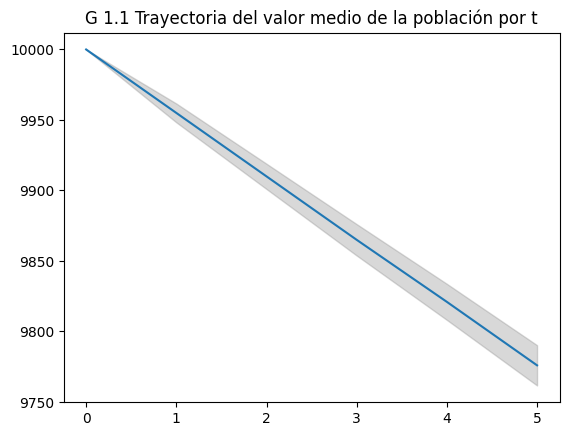

In [ ]:
# Graficamos la evolución de la población en cada t con s simulaciones.
plt.plot(t, evolucion_poblacion)
plt.title("G 1.1 Trayectoria del valor medio de la población por t")
plt.fill_between(t, lim_inf_g11, lim_sup_g11, color='gray', alpha = 0.3)
plt.show()

El grafico nos muestra como evoluciona el valor esperado de la poblacion a medida que avanzamos en los periodos entre t=0 y t=5

In [ ]:
# 2da Interpretación
# Definimos nuevas listas
promedios = []
simulaciones = []

In [ ]:
# Calculamos la esperanza con j simulaciones para graficar la evolución de la esperanza a medida que aumentan las simulaciones. Y llenamos la lista "simulaciones" que funcionará como eje x.
for j in range(1,len(array_poblaciones_t5)+1):
  a = round(sum(array_poblaciones_t5[:j])/j, 2)
  promedios.append(a)
  simulaciones.append(j)

In [ ]:
# Calculamos limites para graficar la dispersión
lim_inf_g12 = promedios - desvio_t5
lim_sup_g12 = promedios + desvio_t5

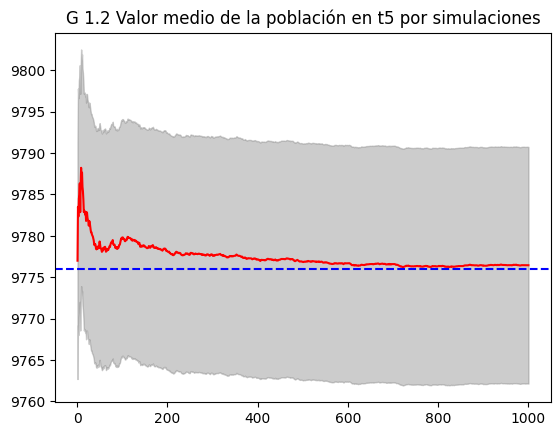

In [ ]:
# Graficamos lo anteriormente descrito
plt.plot(simulaciones, promedios, color="red")
plt.title('G 1.2 Valor medio de la población en t5 por simulaciones')
plt.fill_between(simulaciones, lim_inf_g12, lim_sup_g12, color='gray', alpha = 0.4)
plt.axhline(esperanza_t5, linestyle = "--", color="blue")
plt.show()

Presentamos dos interpretaciones del gráfico sobre la trayectoria del valor medio de la población. En primer lugar, planteamos la media de las 1000 simulaciones por período de tiempo (G 1.1). Es decir, para el t=i, siendo i los valores del tiempo, que en nuestro ejercicio va hasta t=5, promediamos los resultados de las 1000 simulaciones. Así obtuvimos el promedio de la población por cada instante t de tiempo.

En segundo lugar, el promedio de la población por simulación realizada (G 1.2). En este caso, recién a partir de la segunda simulación comienzan a promediarse los valores. Para s=1 el promedio es el valor que nos arroja para la población esa simulación. En s=2, se promedia el valor obtenido en s=1 con el de s=2 y así sucesivamente.

Realizando 10,000 simulaciones obtuvimos un valor esperado de la población simular al que obtenemos simulando solamente 1,000. Para reducir el costo computacional decidimos utilizar 1,000 simulaciones.

Este valor lo elegimos de forma arbitraria pero también podríamos haber elegido un d (desvío) máximo para que actúe de corte para determinar el valor de simulaciones

# 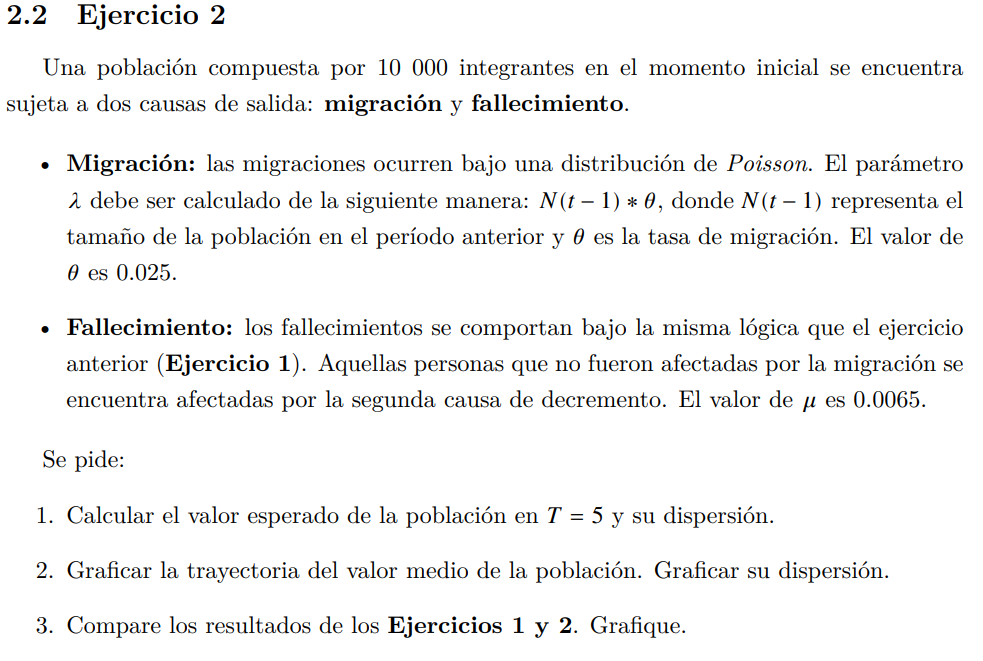

In [ ]:
# Definimos variables
n_inicial = 10000
tita = 0.025
mu = 0.0065
s = 1000
i = 0
array_poblaciones_2_t5 = []
array_poblaciones_2_t4 = []
array_poblaciones_2_t3 = []
array_poblaciones_2_t2 = []
array_poblaciones_2_t1 = []

In [ ]:
# Este bucle simula s veces la evolución de la población hasta t5 y los s tamaños de población en t1, en t2 y así hasta t5. Una lista para cada t.
while i<s:
  n = n_inicial
  for t in range (1,6):
    lam = n * tita
    migrantes = rng.poisson(lam)
    n = n - migrantes
    fallecidos = rng.binomial(n, mu)
    n = n - fallecidos
    if t == 1:
      array_poblaciones_2_t1.append(n)
    elif t==2:
      array_poblaciones_2_t2.append(n)
    elif t==3:
      array_poblaciones_2_t3.append(n)
    elif t==4:
      array_poblaciones_2_t4.append(n)
    elif t==5:
      array_poblaciones_2_t5.append(n)
  i = i+1

In [ ]:
# Calculamos la esperanza y el desvío sobre "array_poblaciones_2_ti" que contiene los valores correspondientes a las "s" simulaciones.
esperanza_2_t5 = round(sum(array_poblaciones_2_t5)/len(array_poblaciones_2_t5), 0)
esperanza_2_t4 = round(sum(array_poblaciones_2_t4)/len(array_poblaciones_2_t4), 0)
esperanza_2_t3 = round(sum(array_poblaciones_2_t3)/len(array_poblaciones_2_t3), 0)
esperanza_2_t2 = round(sum(array_poblaciones_2_t2)/len(array_poblaciones_2_t2), 0)
esperanza_2_t1 = round(sum(array_poblaciones_2_t1)/len(array_poblaciones_2_t1), 0)
desvio_2_t5 = round(np.std(array_poblaciones_2_t5), 2)
desvio_2_t4 = round(np.std(array_poblaciones_2_t4), 2)
desvio_2_t3 = round(np.std(array_poblaciones_2_t3), 2)
desvio_2_t2 = round(np.std(array_poblaciones_2_t2), 2)
desvio_2_t1 = round(np.std(array_poblaciones_2_t1), 2)

In [ ]:
print( f'R 2.1: El valor esperado de la población en T = 5 es {esperanza_2_t5} y su desvío es {desvio_2_t5}')

R 2.1: El valor esperado de la población en T = 5 es 8528.0 y su desvío es 35.76


In [ ]:
# Estas listas servirán para graficar la evolución de la población a lo largo de t con sus correspondientes desvíos. (Gráfico 2.1)
evolucion_poblacion_2 = [n_inicial, esperanza_2_t1, esperanza_2_t2, esperanza_2_t3, esperanza_2_t4, esperanza_2_t5]
desvios_2 = [0, desvio_2_t1, desvio_2_t2, desvio_2_t3, desvio_2_t4, desvio_2_t5]
t = [0,1,2,3,4,5]

In [ ]:
# Definimos límites superior e inferior sumando y restando el desvío a cada valor en t para graficar el intervalo.
lim_inf_g21 = []
lim_sup_g21 = []
d = 0
for i in evolucion_poblacion_2:
  lim_inf_g21.append(i-desvios_2[d])
  lim_sup_g21.append(i+desvios_2[d])
  d = d + 1

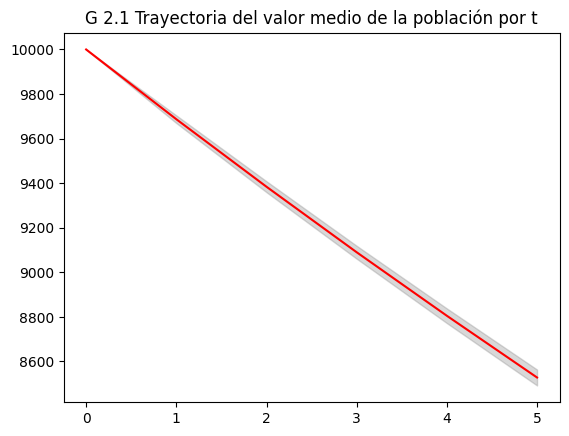

In [ ]:
# Graficamos la evolución de la población en cada t con s simulaciones.
plt.plot(t, evolucion_poblacion_2, color = "red")
plt.title('G 2.1 Trayectoria del valor medio de la población por t')
plt.fill_between(t, lim_inf_g21, lim_sup_g21, color='gray', alpha = 0.3)
plt.show()

El grafico nos muestra como evoluciona el valor esperado de la poblacion a medida que avanzamos en los periodos entre t=0 y t=5

In [ ]:
# 2da Interpretación
# Deifnimos nuevas listas
promedios_2 = []
simulaciones_2 =[]

In [ ]:
# Calculamos la esperanza con j simulaciones para graficar la evolución de la esperanza a medida que aumentan las simulaciones. Y llenamos la lista "simulaciones" que funcionará como eje x.
for j in range(1,len(array_poblaciones_2_t5)+1):
  a = round(sum(array_poblaciones_2_t5[:j])/j, 2)
  promedios_2.append(a)
  simulaciones_2.append(j)

In [ ]:
# Calculamos limites para graficar la dispersión
lim_inf_g22 = promedios_2 - desvio_2_t5
lim_sup_g22 = promedios_2 + desvio_2_t5

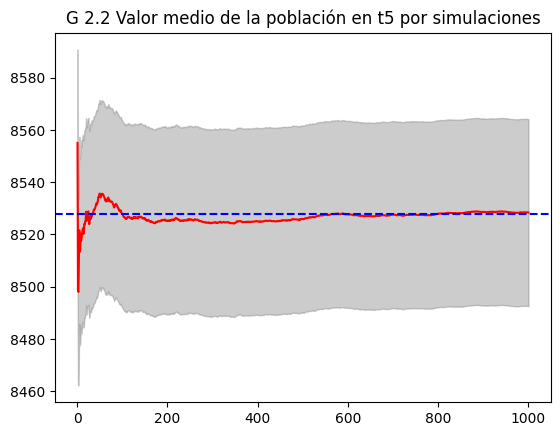

In [ ]:
# Graficamos lo anteriormente descrito
plt.plot(simulaciones_2, promedios_2, color="red")
plt.title('G 2.2 Valor medio de la población en t5 por simulaciones')
plt.fill_between(simulaciones_2, lim_inf_g22, lim_sup_g22, color='gray', alpha = 0.4)
plt.axhline(esperanza_2_t5, linestyle = "--", color="blue")
plt.show()

Presentamos dos interpretaciones del gráfico sobre la trayectoria del valor medio de la población. En primer lugar, planteamos la media de las 1000 simulaciones por período de tiempo (G 2.1). Es decir, para el t=i, siendo i los valores del tiempo, que en nuestro ejercicio va hasta t=5, promediamos los resultados de las 1000 simulaciones. Así obtuvimos el promedio de la población por cada instante t de tiempo.

En segundo lugar, el promedio de la población por simulación realizada (G 2.2). En este caso, recién a partir de la segunda simulación comienzan a promediarse los valores. Para s=1 el promedio es el valor que nos arroja para la población esa simulación. En s=2, se promedia el valor obtenido en s=1 con el de s=2 y así sucesivamente.

Realizando 10,000 simulaciones obtuvimos un valor esperado de la población simular al que obtenemos simulando solamente 1,000. Para reducir el costo computacional decidimos utilizar 1,000 simulaciones.

Este valor lo elegimos de forma arbitraria pero también podríamos haber elegido un d (desvío) máximo para que actúe de corte para determinar el valor de simulaciones

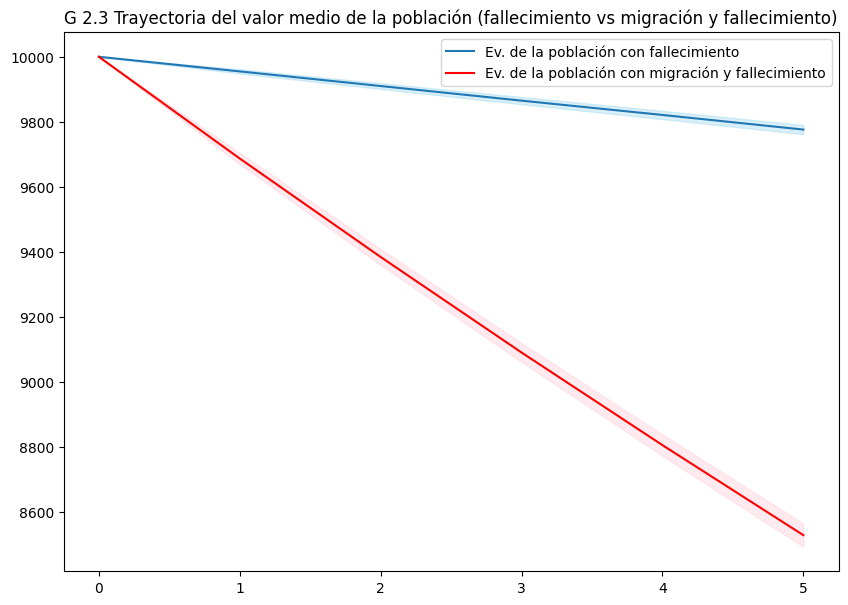

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(t, evolucion_poblacion, label ='Ev. de la población con fallecimiento')
plt.fill_between(t, lim_inf_g11, lim_sup_g11, color="skyblue", alpha=0.3)
plt.plot(t, evolucion_poblacion_2, color="red", label ='Ev. de la población con migración y fallecimiento')
plt.fill_between(t, lim_inf_g21, lim_sup_g21, color="pink", alpha=0.3)
plt.title("G 2.3 Trayectoria del valor medio de la población (fallecimiento vs migración y fallecimiento)")
plt.legend()
plt.show()

El gráfico comparativo fue realizado con la primera interpretación, es decir la trayectoria en el tiempo. Se muestra en rojo el gráfico con migración y fallecimiento, y en azul el gráfico con solamente fallecimiento. Este gráfico refleja que al agregar migración como otra causa más de salida, la trayectoria de la población decrece más rápido. Por período la población en "2" descrece en mayor cuantía que en "1", y esto se debe no solo a la migración sino también a que la tasa de fallecimiento es mayor (0.0065 contra 0.0045), esto está reflejado en el valor simulado de la población al período 5. En el primer ejercicio la población en t=5 es aproximadamente 9776 mientras que en el segundo, la población es de 8528.

# Ejercicio 3
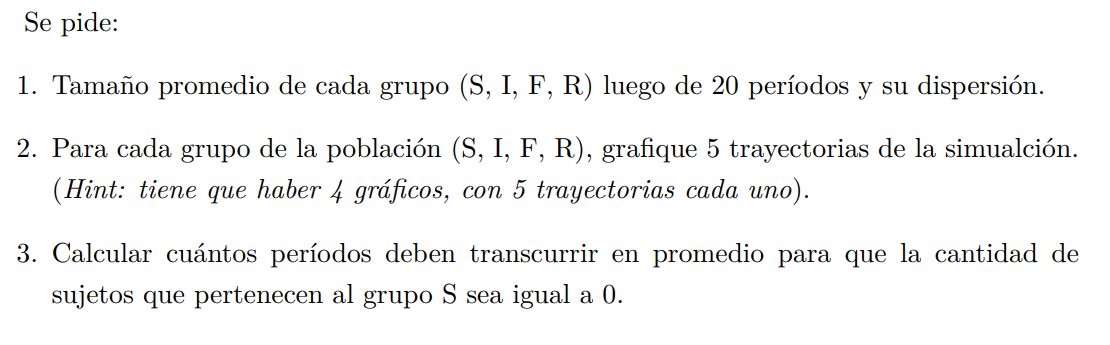

In [ ]:
# Definimos tasas y variables
l = 0.1 # tasa de infección
mu = 0.02 # tasa de mortalidad
v = 0.05 # tasa mortalidad p/ enfermos
w = 0.03 # tasa de mortalidad p/ recuperados
ro = 0.1 # tasa de recuperación
T = 20
S = 1000
array_diccionarios = []

In [ ]:
# Importamos esta librería para poder resolver el ítem 2.
import copy

In [ ]:
# Definimos estas listas para el ítem 2
array_sanos_dic = []
array_infectados_dic = []
array_fallecidos_dic = []
array_recuperados_dic = []
sanos_dic = {}
infectados_dic = {}
fallecidos_dic = {}
recuperados_dic = {}

In [ ]:
# Este bucle simula S veces la evolución de la población de t1 a t20, y almacena, para las primeras 5 simulaciones (array de dics), el tamaño de la población segmentada por grupo en cada t (dics).
# Además, almacenamos la población en t20 para todas las simulaciones en el array_poblaciones.
i = 0
while i<S:
  poblacion = {'S': 9000, 'I':1000, 'F':0, 'R':0 }
  sanos_dic[0] = poblacion['S']
  infectados_dic[0] = poblacion['I']
  fallecidos_dic[0] = poblacion['F']
  recuperados_dic[0] = poblacion['R']

  for t in range(1, T+1):
    infectados_nuevos = round(l*rng.exponential(l)*poblacion['S'])
    poblacion['S'] = poblacion['S'] - infectados_nuevos
    fallecidos = round(mu*rng.exponential(mu)*poblacion['S'])
    poblacion['S'] = poblacion['S'] - fallecidos

    infectados_fallecidos = round(v*rng.exponential(v)*poblacion['I'])

    recuperados_nuevos = round(ro*rng.exponential(ro)*poblacion['I'])
    poblacion['I'] = poblacion['I'] + infectados_nuevos - infectados_fallecidos - recuperados_nuevos

    recuperados_fallecidos = round(w*rng.exponential(w)*poblacion['R'])
    poblacion['R'] = poblacion['R'] + recuperados_nuevos - recuperados_fallecidos
    poblacion['F'] = poblacion['F'] + fallecidos + infectados_fallecidos + recuperados_fallecidos

    if i<5:
      sanos_dic[t] = poblacion['S']
      infectados_dic[t] = poblacion['I']
      fallecidos_dic[t] = poblacion['F']
      recuperados_dic[t] = poblacion['R']

  if i<5:
    array_sanos_dic.append(copy.deepcopy(sanos_dic))
    array_infectados_dic.append(copy.deepcopy(infectados_dic))
    array_fallecidos_dic.append(copy.deepcopy(fallecidos_dic))
    array_recuperados_dic.append(copy.deepcopy(recuperados_dic))
  array_diccionarios.append(poblacion)
  i = i+1

In [ ]:
# Desarmamos los diccionarios para podes calcular luego el tamaño medio de cada grupo luego de 20 períodos.
sanos = []
infectados = []
muertos = []
recuperados = []

for diccionario in array_diccionarios:
  sanos.append(diccionario.get('S'))
  infectados.append(diccionario.get('I'))
  muertos.append(diccionario.get('F'))
  recuperados.append(diccionario.get('R'))

In [ ]:
# Calculamos el tamaño medio de cada grupo luego de 20 períodos y los correspondientes desvíos.
media_sanos = round(sum(sanos)/len(sanos))
media_infectados = round(sum(infectados)/len(infectados))
media_muertos = round(sum(muertos)/len(muertos))
media_recuperados = round(sum(recuperados)/len(recuperados))
desvio_sanos = round(np.std(sanos),2)
desvio_infectados = round(np.std(infectados),2)
desvio_muertos = round(np.std(muertos),2)
desvio_recuperados = round(np.std(recuperados),2)

In [ ]:
print(f'R 3.1.1 Transcurridos 20 períodos, el tamaño promedio de la población sana es {media_sanos}, el de la población infectada {media_infectados}, el de la población fallecida {media_muertos}, y el de la recuperada {media_recuperados}')
print(f'R 3.1.2 Los respectivos desvíos son {desvio_sanos}, {desvio_infectados}, {desvio_muertos} y {desvio_recuperados}.')

R 3.1.1 Transcurridos 20 períodos, el tamaño promedio de la población sana es 7293, el de la población infectada 2235, el de la población fallecida 148, y el de la recuperada 324
R 3.1.2 Los respectivos desvíos son 328.42, 298.44, 25.82 y 80.07.


# Ejercicio 3.2

In [ ]:
# Eje x
t = [i for i in range(21)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
# Desarmo los diccionarios en listas por grupo para luego graficar. (Cada lista es una simulación con 20 períodos. Tenemos 5 diccionarios, es decir 5 simulaciones para graficar por grupo.)
sims_sanos = []
sims_infectados = []
sims_muertos = []
sims_recuperados = []

for dic in array_sanos_dic:
  y = list(dic.values())
  sims_sanos.append(y)
for dic in array_infectados_dic:
  y = list(dic.values())
  sims_infectados.append(y)
for dic in array_fallecidos_dic:
  y = list(dic.values())
  sims_muertos.append(y)
for dic in array_recuperados_dic:
  y = list(dic.values())
  sims_recuperados.append(y)

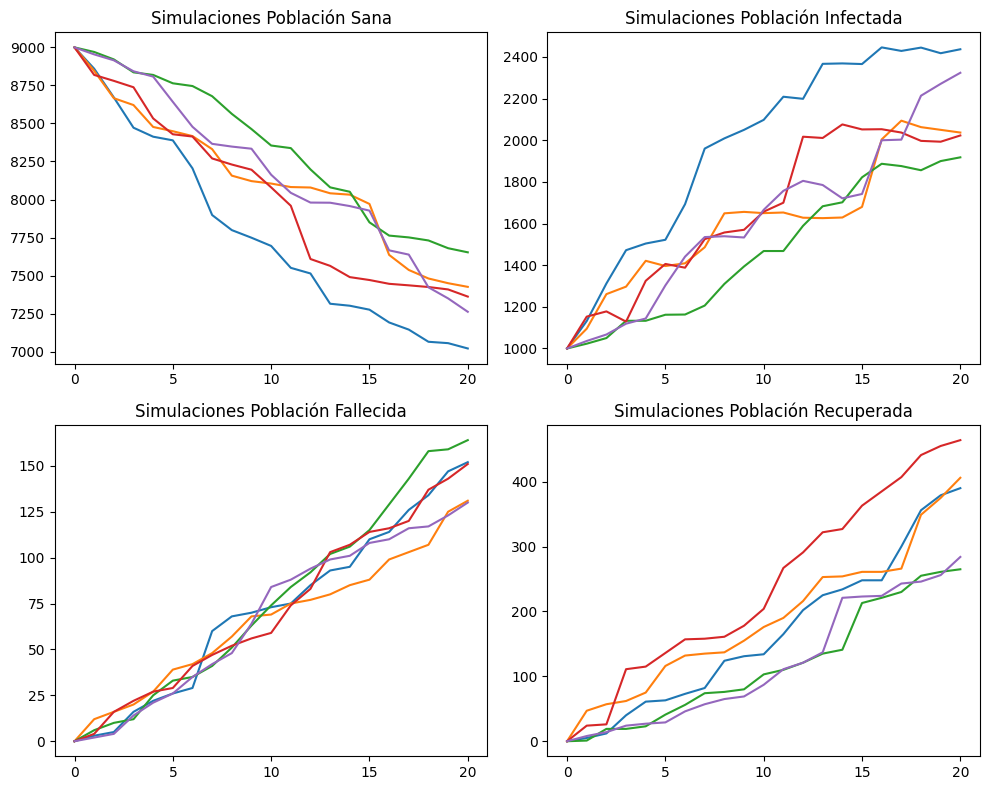

In [ ]:
# Generamos subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for l in sims_sanos:
  axs[0, 0].plot(t, l)

for l in sims_infectados:
  axs[0,1].plot(t, l)

for l in sims_muertos:
  axs[1,0].plot(t, l)

for l in sims_recuperados:
  axs[1,1].plot(t, l)

# Ponemos títulos a cada subgráfico
axs[0, 0].set_title('Simulaciones Población Sana')
axs[0, 1].set_title('Simulaciones Población Infectada')
axs[1, 0].set_title('Simulaciones Población Fallecida')
axs[1, 1].set_title('Simulaciones Población Recuperada')

for ax in axs.flat:
    ax.set_xticks(range(0, len(t), 5))

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

# Ejercicio 3.3

En este ultimo inciso nos encontramos con un problema, ya que al realizar varias iteraciones de t llegamos cada vez a una población inicial menor, y encontramos un simil a una asintota en n=9. En este punto la población sobre la cual se aplican las tasas es tan chica que el efecto sobre la misma para calcular la población inicial en el periodo siguiente es poco significativo y no logra llegar al cero. Por este motivo presentamos dos alternativas. En primer lugar, utilizamos el 9 como si fuese el 0 y lo consideramos el piso. Sin embargo, la cantidad de períodos que deben transcurrir en promedio para que la población sana llegue a 0 varía mucho si movemos el piso de 9 a 10, o de 9 a 8, etc. Es por eso que planteamos una segunda alternativa.
En segundo lugar, modificamos la fórmula de manera que en todos los periodos se produzca al menos un fallecimiento, asi eventualmente obtenemos una población nula, esto empieza a correr a partir de que la población sana desciende por debajo de los 50 individuos.

Caso 1

In [ ]:
# Definimos tasas y variables
l = 0.1 # tasa de infección
mu = 0.02 # tasa de mortalidad
v = 0.05 # tasa mortalidad p/ enfermos
w = 0.03 # tasa de mortalidad p/ recuperados
ro = 0.1 # tasa de recuperación
S = 1000
array_diccionarios = []
periodos_s0 = []

In [ ]:
# Este bucle realiza S simulaciones, iterando períodos hasta que la población sana llegue a 0. Dado que tuvimos un incoveniente, seteamos el corte en 9 individuos.
i = 0
while i<S:
  poblacion = {'S': 9000, 'I':1000, 'F':0, 'R':0 }
  for t in range(1, 2000):
      infectados_nuevos = round(l*rng.exponential(l)*poblacion['S'])
      poblacion['S'] = poblacion['S'] - infectados_nuevos
      fallecidos = round(mu*rng.exponential(mu)*poblacion['S'])
      poblacion['S'] = poblacion['S'] - fallecidos

      infectados_fallecidos = round(v*rng.exponential(v)*poblacion['I'])

      recuperados_nuevos = round(ro*rng.exponential(ro)*poblacion['I'])
      poblacion['I'] = poblacion['I'] + infectados_nuevos - infectados_fallecidos - recuperados_nuevos

      recuperados_fallecidos = round(w*rng.exponential(w)*poblacion['R'])
      poblacion['R'] = poblacion['R'] + recuperados_nuevos - recuperados_fallecidos
      poblacion['F'] = poblacion['F'] + fallecidos + infectados_fallecidos + recuperados_fallecidos

      if poblacion['S']-9<= 0:
        periodos_s0.append(t)
        break

  i = i+1

In [ ]:
print(f'R 3.3 (C1) La cantidad de períodos que deben transcurrir en promedio para que los sujetos sanos lleguen a 0 es {round(sum(periodos_s0)/len(periodos_s0))}')

R 3.3 (C1) La cantidad de períodos que deben transcurrir en promedio para que los sujetos sanos lleguen a 0 es 1156


Caso 2

In [ ]:
# Definimos variables
l = 0.1 # tasa de infección
mu = 0.02 # tasa de mortalidad
v = 0.05 # tasa mortalidad p/ enfermos
w = 0.03 # tasa de mortalidad p/ recuperados
ro = 0.1 # tasa de recuperación
S = 1000
array_diccionarios = []
periodos_s0_2 = []

In [ ]:
# Este bucle realiza S simulaciones, iterando períodos hasta que la población sana llegue a 0. Dado que tuvimos un incoveniente, modificamos la fórmula para garantizar al menos un fallecido por período a partir de que la poblacion sana baja de los 50 individuos.
i = 0
while i<S:
  poblacion = {'S': 9000, 'I':1000, 'F':0, 'R':0 }

  for t in range(1, 2000):
      infectados_nuevos = round(l*rng.exponential(l)*poblacion['S'])
      poblacion['S'] = poblacion['S'] - infectados_nuevos
      if (poblacion['S'] + infectados_nuevos) < 50:
        fallecidos = round(mu*rng.exponential(mu)*poblacion['S'])+1
      else:
        fallecidos = round(mu*rng.exponential(mu)*poblacion['S'])

      poblacion['S'] = poblacion['S'] - fallecidos

      infectados_fallecidos = round(v*rng.exponential(v)*poblacion['I'])

      recuperados_nuevos = round(ro*rng.exponential(ro)*poblacion['I'])
      poblacion['I'] = poblacion['I'] + infectados_nuevos - infectados_fallecidos - recuperados_nuevos

      recuperados_fallecidos = round(w*rng.exponential(w)*poblacion['R'])
      poblacion['R'] = poblacion['R'] + recuperados_nuevos - recuperados_fallecidos
      poblacion['F'] = poblacion['F'] + fallecidos + infectados_fallecidos + recuperados_fallecidos

      if poblacion['S']<= 0:
        periodos_s0_2.append(t)
        break

  i = i+1

In [ ]:
print(f'R 3.3 (C2) La cantidad de períodos que deben transcurrir en promedio para que los sujetos sanos lleguen a 0 es {round(sum(periodos_s0_2)/len(periodos_s0_2))}')

R 3.3 (C2) La cantidad de períodos que deben transcurrir en promedio para que los sujetos sanos lleguen a 0 es 559
